In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Effiecient_df = pd.read_csv("CollaborativeProject1/monthly_data.csv", parse_dates=True, index_col="Date")
Tickers= Effiecient_df[['HST','NWS','GPC','KO']]

In [3]:
Tickers_1=np.log(Tickers/Tickers.shift(1))

In [5]:
np.random.seed(42)
num_portfolios = 5000

In [6]:
all_weights = np.zeros((num_portfolios, len(Tickers.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

In [7]:
np.random.seed(42)
num_portfolios = 5000

In [8]:
# populate the empty lists with each portfolios returns,risk and weights
for x in range (num_portfolios):
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    all_weights[x,:] = weights
    ret_arr[x] = np.sum( (Tickers_1.mean() * weights * 252))
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(Tickers_1.cov()*252, weights)))
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [9]:
print('Max:{}'.format(sharpe_arr.max()))
print('Arr:{}'.format(sharpe_arr.argmax()))

Max:3.2611520752204433
Arr:1464


In [10]:
print(all_weights[214,:])
max_sharp_return= ret_arr[sharpe_arr.argmax()]
max_sharp_vol= vol_arr[sharpe_arr.argmax()]

[0.03208457 0.41439684 0.49583725 0.05768134]


In [11]:
print(all_weights[214,:])
min_sharp_return= ret_arr[sharpe_arr.argmin()]
min_sharp_vol= vol_arr[sharpe_arr.argmin()]

[0.03208457 0.41439684 0.49583725 0.05768134]


In [12]:
portfolio = {'Returns': ret_arr,
             'Volatility': vol_arr,
             'Sharpe Ratio': sharpe_arr}

In [13]:
df = pd.DataFrame(portfolio)

In [14]:
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in Tickers]

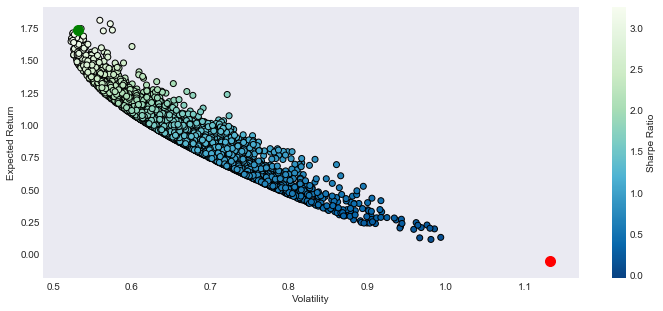

In [15]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(12,5))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='GnBu_r',edgecolors='black')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.scatter(max_sharp_vol, max_sharp_return,c='green', s=100)
plt.scatter(min_sharp_vol, min_sharp_return,c='red', s=100) # red dot
plt.show()